**install pycaret and catboost**

In [ ]:
!pip install pycaret
!pip install catboost

**help functions**

In [2]:
%run "/content/drive/MyDrive/Colab Notebooks/algorithms/algo_builder_functions.ipynb"

**Get meteorological model and station**

In [3]:
met_model , met_station , df_all, df_coor = select_metmodel_station() 

Select meteorological model number

0 lat42.225lon-8.63p10R4KmD0.csv
1 lat42.225lon-8.63p10R4KmD1.csv
2 lat42.225lon-8.63p10R4KmD2.csv
3 lat42.58lon-8.8046p4R4KmD1.csv
4 lat42.626lon-8.7836p4R4KmD0.csv
5 lat42.626lon-8.7836p4R4KmD1.csv
6 lat42.626lon-8.7836p4R4KmD2.csv
7 lat40.5lon-3.6p4R12KmD0.csv
8 lat40.5lon-3.6p4R12KmD1.csv
9 lat42.898lon-8.418p4R4KmD1.csv
10 lat42.898lon-8.418p5R4KmD0.csv
11 lat42.58lon-8.8046p4R4KmD0.csv
12 lat42.58lon-8.8046p4R4KmD2.csv
13 lat42.58lon-8.8046p4R4KmD3.csv
0
Select station number

0 cortegada.csv
1 LEVX.csv
2 LEST.csv
3 coron.csv
1
select month (y/n): n
independent variables : ['dir0', 'mod0', 'wind_gust0', 'mslp0', 'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0', 'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500']
dependent variables: ['Unnamed: 0', 'temp_o', 'tempd_o', 'rh_o', 'dir_o', 'spd_o', 'wind_gust_o', 'mslp_o', 'visibility_o', 'skyc1_o', 'skyc2_o', 'skyc3_o'

**Label y variable**

In [4]:
interval, labels , df_all, y_var = label_y() 

0 temp_o
1 tempd_o
2 rh_o
3 dir_o
4 spd_o
5 wind_gust_o
6 mslp_o
7 visibility_o
8 skyc1_o
9 skyc2_o
10 skyc3_o
11 skyl1_o
12 skyl2_o
13 skyl3_o
14 wxcodes_o
15 metar_o
16 fr_o
Select independent variable number
14
0 <function metar_fg_br at 0x7f18af7cedd0>
1 <function metar_ra_dz at 0x7f18af7cec20>
Select label function number
0
No FG/BR    0.861037
FG/BR       0.138963
Name: Y_label, dtype: float64
df_all Y_label column and wxcodes_o
                      Y_label wxcodes_o
2016-04-25 20:00:00  No FG/BR         M
2012-03-10 06:00:00  No FG/BR         M
2015-02-03 18:00:00  No FG/BR         M
2008-07-13 17:00:00  No FG/BR         M
2020-08-16 19:00:00     FG/BR    -RA FG
2009-10-20 20:00:00  No FG/BR         M
2009-08-25 17:00:00  No FG/BR         M
2018-07-23 15:00:00  No FG/BR         M
2017-05-08 03:00:00  No FG/BR         M
2019-02-05 13:00:00  No FG/BR         M
2019-10-21 07:00:00  No FG/BR         M
2019-03-03 08:00:00  No FG/BR         M
2013-02-02 11:00:00  No FG/BR         M
2

**meteorological model score**

In [ ]:
met_var_sc , x_and_y_same = metmodel_score(df_all,y_var)

**Pycaret**

In [10]:
from pycaret.utils import enable_colab
enable_colab()
from pycaret.classification import *
df_py=df_all[[col for col in df_all.columns if not (col.endswith("o") or col.startswith("U"))]]
clf_all = setup(df_py, target="Y_label", session_id=1,feature_selection = False,
                feature_selection_threshold=0.8,remove_multicollinearity =False, remove_outliers=False,
                normalize =True ,pca =True, pca_components=180, train_size=0.9,
                fix_imbalance=True,use_gpu = False,transformation=False,
                remove_perfect_collinearity=False)
best_model = compare_models(fold=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8790,0.8757,0.9455,0.9166,0.9308,0.4488,0.4523,42.980
rf,Random Forest Classifier,0.8754,0.8773,0.9344,0.9219,0.9281,0.4598,0.4604,151.725
lightgbm,Light Gradient Boosting Machine,0.8240,0.8745,0.8414,0.9484,0.8917,0.4312,0.4542,19.190
dt,Decision Tree Classifier,0.7873,0.6740,0.8308,0.9143,0.8706,0.2811,0.2916,42.840
gbc,Gradient Boosting Classifier,0.7868,0.8590,0.7927,0.9516,0.8649,0.3785,0.4169,499.105
knn,K Neighbors Classifier,0.7808,0.8644,0.7737,0.9648,0.8587,0.3950,0.4477,316.330
ada,Ada Boost Classifier,0.7661,0.8314,0.7740,0.9444,0.8507,0.3344,0.3729,97.760
lr,Logistic Regression,0.7614,0.8587,0.7563,0.9577,0.8452,0.3551,0.4072,19.960
lda,Linear Discriminant Analysis,0.7550,0.8572,0.7472,0.9592,0.8400,0.3494,0.4049,9.710
ridge,Ridge Classifier,0.7549,0.0000,0.7472,0.9592,0.8400,0.3494,0.4048,6.900


In [11]:
modelpy=create_model("et",fold=5)
evaluate_model(modelpy)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8853,0.8859,0.9480,0.9212,0.9344,0.4812,0.4843
1,0.8797,0.8816,0.9427,0.9196,0.9310,0.4622,0.4643
2,0.8821,0.8868,0.9448,0.9204,0.9325,0.4706,0.4731
3,0.8813,0.8868,0.9427,0.9213,0.9319,0.4717,0.4736
4,0.8820,0.8814,0.9454,0.9197,0.9324,0.4678,0.4705
Mean,0.8821,0.8845,0.9447,0.9204,0.9324,0.4707,0.4732
SD,0.0018,0.0025,0.0020,0.0007,0.0011,0.0062,0.0065


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Select machine learning model and test it**

0.23.2
model variables
 ['dir0', 'mod0', 'wind_gust0', 'mslp0', 'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0', 'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1', 'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1', 'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001', 'HGT8501', 'T5001', 'T8501', 'dir2', 'mod2', 'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2', 'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2', 'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502', 'dir3', 'mod3', 'wind_gust3', 'mslp3', 'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3', 'prec3', 'swflx3', 'shflx3', 'cape3', 'cin3', 'cfh3', 'cfl3', 'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'dir4', 'mod4', 'wind_gust4', 'mslp4', 'temp4', 'rh4', 'visibility4', 'lhflx4', 'lwflx4

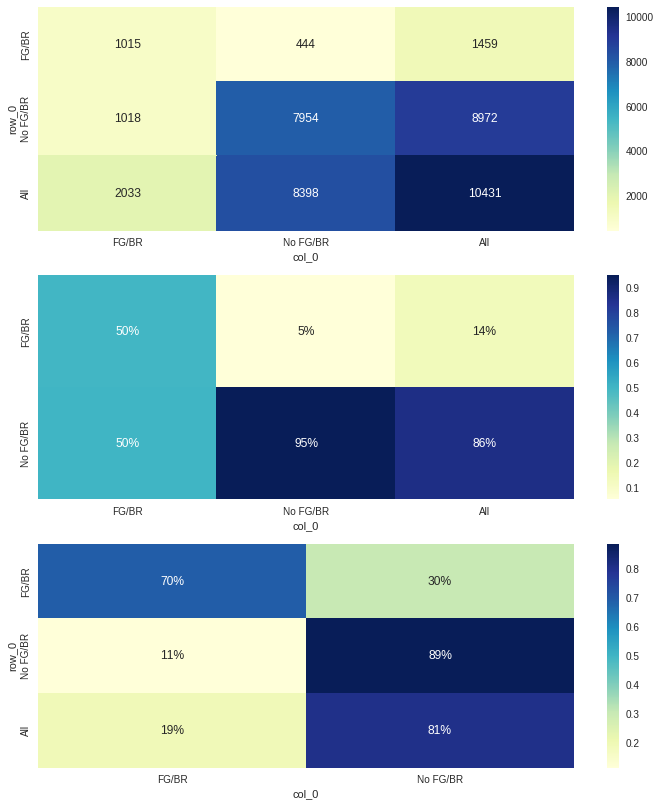

In [14]:
x_var , scaler , pca , model , y_pred , y_test = selectx_pca_train(df_all)
global_ml, column_ml, index_ml , clas_ml = m_learning_sc (y_test, y_pred, x_var, scaler, pca, df_all)

**Save file as ".al" with sklearn algorithm**

In [ ]:
save_al()

**tensorflow algorithm. Labels should be integers**

In [ ]:
#@title tensorflow algorithm. Labels should be integers
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import tensorflow as tf
import pandas as pd
import numpy as np


print("model variables\n",[ele for ele in df_all.columns if not ele.endswith("_o")][:-2])
all_x_var=input ("all x variables? (y/n)\n")
    
if all_x_var=="y":
  X=df_all[[ele for ele in df_all.columns if not ele.endswith("_o")][:-2]]
  x_var=X.columns
        
else:
  lsx=input("list of x variables\n").replace("'","").replace(" ","").replace("\n","")
  x_var=list(lsx.split(","))
  X=df_all[x_var]
        
        
PCA_n=int(input("PCA number less than {}\n".format(len(x_var)))) 
    
#split better stratify=Y.values
x_train, x_test, y_train, y_test = train_test_split(X.values,df_all.Y_label.values,
                                                    test_size=0.1,
                                                    #stratify=df_all.Y_label.values,
                                                    random_state=10)
    
#scaler X
scaler=StandardScaler().fit(x_train)
x_sc=scaler.transform(x_train)
    
#pca 
pca = PCA(n_components=PCA_n,svd_solver='arpack',random_state=1)
x_pca = pca.fit_transform(x_sc)

#Tensor flow binary traslation
num_classes = len(y_train.value_counts())
y_trainb = tf.keras.utils.to_categorical(y_train, num_classes=num_classes, )
y_testb = tf.keras.utils.to_categorical(y_test, num_classes=num_classes, )


#tensor network definition
#input layer
l0 = tf.keras.layers.Dense(units=120, activation="relu", input_shape=[PCA_n],) 

#mid layer
l1=tf.keras.layers.Dense(units=120,)

#output layer
l2 = tf.keras.layers.Dense(units=len(y_trainb[0]),activation="softmax")
model = tf.keras.Sequential([l0,l2])

#model compilation
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001,), metrics=['accuracy',])
model.summary()

#model history

history = model.fit(x_pca, y_trainb, epochs=100, batch_size=128,validation_data=(pca.transform(scaler.transform(x_test)), y_testb),verbose=True)
hist=pd.DataFrame(history.history)
hist.plot(grid=True);

#evaluation get y_pred
y_pred=[]
for n in model.predict(pca.transform(scaler.transform(x_test))):
  y_pred.append(np.argmax(n))
y_pred=np.array(y_pred)

**Tensorflow score**

In [ ]:
global_ml, column_ml, index_ml , clas_ml = m_learning_sc (y_test, y_pred, x_var, scaler, pca, df_all)

**lightgbm algorithm**

model variables
 ['dir0', 'mod0', 'wind_gust0', 'mslp0', 'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0', 'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1', 'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1', 'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001', 'HGT8501', 'T5001', 'T8501', 'dir2', 'mod2', 'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2', 'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2', 'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502', 'dir3', 'mod3', 'wind_gust3', 'mslp3', 'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3', 'prec3', 'swflx3', 'shflx3', 'cape3', 'cin3', 'cfh3', 'cfl3', 'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'dir4', 'mod4', 'wind_gust4', 'mslp4', 'temp4', 'rh4', 'visibility4', 'lhflx4', 'lwflx4', 'con

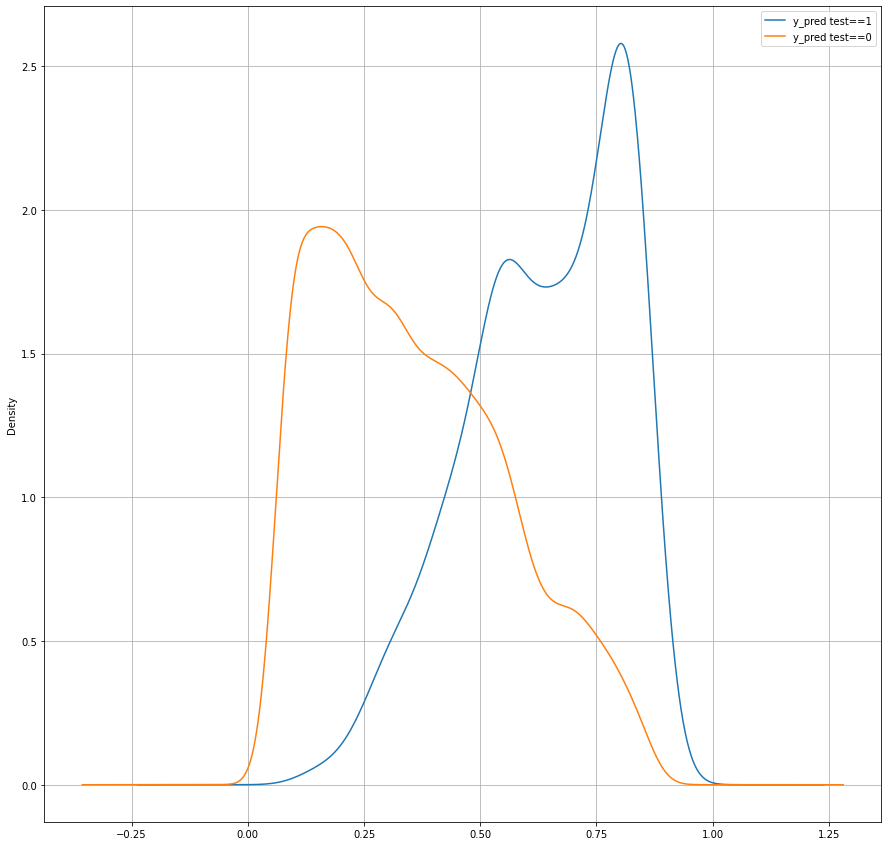

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import lightgbm as lgb
import pandas as pd
import numpy as np



print("model variables\n",[ele for ele in df_all.columns if not ele.endswith("_o")][:-2])
all_x_var=input ("all x variables? (y/n)\n")
    
if all_x_var=="y":
  X=df_all[[ele for ele in df_all.columns if not ele.endswith("_o")][:-2]]
  x_var=X.columns
        
else:
  lsx=input("list of x variables\n").replace("'","").replace(" ","").replace("\n","")
  x_var=list(lsx.split(","))
  X=df_all[x_var]
        
        
PCA_n=int(input("PCA number less than {}\n".format(len(x_var)))) 
    
#split better stratify=Y.values
x_train, x_test, y_train, y_test = train_test_split(X.values,df_all.Y_label.values,
                                                    test_size=0.1,
                                                    #stratify=df_all.Y_label.values,
                                                    random_state=10)
    
#scaler X
scaler=StandardScaler().fit(x_train)
x_sc=scaler.transform(x_train)
    
#pca 
pca = PCA(n_components=PCA_n,svd_solver='arpack',random_state=1)
x_pca = pca.fit_transform(x_sc)


#balanced data
balan= input("balance train data ? (y/n)\n")
if balan=="y":
  X_res, y_res =SMOTE().fit_resample(x_pca,y_train)
  d_train = lgb.Dataset(X_res, label=y_res)

else:
  d_train = lgb.Dataset(x_pca, label=y_train.to_numpy())

#lgb algorithm parameters

params = {}
params['learning_rate'] = 0.01
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
#params['objective'] = 'multiclass'
#params['metric']='multi_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 70

model = lgb.train(params, d_train, 300)
y_pred=model.predict(pca.transform(scaler.transform(x_test)))


#plot results

result=pd.DataFrame({"y_pred":y_pred, "y_test":y_test.to_numpy()})
pd.DataFrame({"y_pred test==1":result["y_pred"][result.y_test==1],
 "y_pred test==0":result["y_pred"][result.y_test==0]}).plot(kind="kde",figsize=(15,15),grid=True);

**lightgbm score**

threshold: 0.6
              precision    recall  f1-score       support
0              0.969986  0.862651  0.913175   9778.000000
1              0.225937  0.600306  0.328308    653.000000
accuracy       0.846228  0.846228  0.846228      0.846228
macro avg      0.597961  0.731479  0.620742  10431.000000
weighted avg   0.923407  0.846228  0.876562  10431.000000
threshold: 0.61
              precision    recall  f1-score       support
0              0.969038  0.870628  0.917201   9778.000000
1              0.231470  0.583461  0.331448    653.000000
accuracy       0.852651  0.852651  0.852651      0.852651
macro avg      0.600254  0.727044  0.624325  10431.000000
weighted avg   0.922865  0.852651  0.880532  10431.000000
threshold: 0.62
              precision    recall  f1-score       support
0              0.968503  0.877378  0.920691   9778.000000
1              0.237762  0.572741  0.336029    653.000000
accuracy       0.858307  0.858307  0.858307      0.858307
macro avg      0.603133  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


              precision    recall  f1-score       support
0              0.949658  0.980057  0.964618   9778.000000
1              0.426471  0.222052  0.292044    653.000000
accuracy       0.932605  0.932605  0.932605      0.932605
macro avg      0.688064  0.601055  0.628331  10431.000000
weighted avg   0.916906  0.932605  0.922514  10431.000000


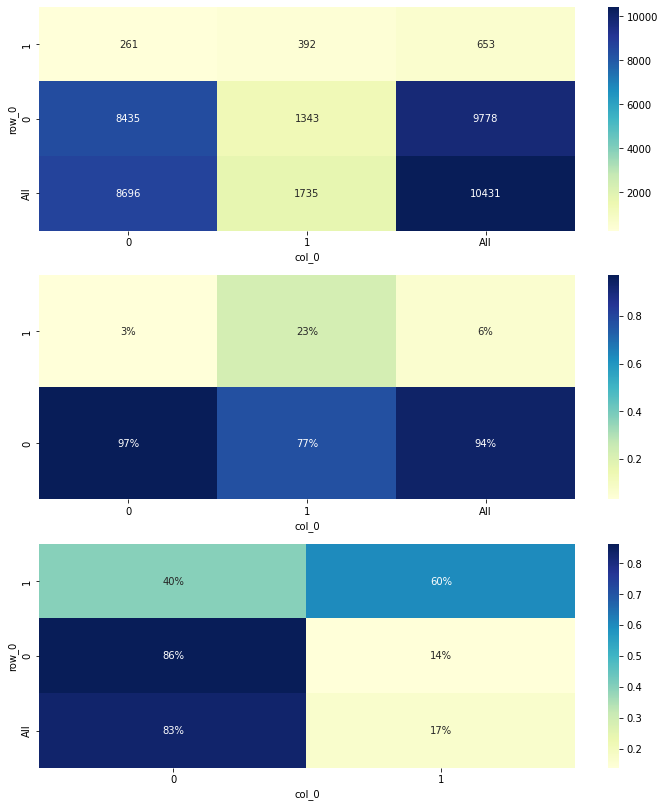

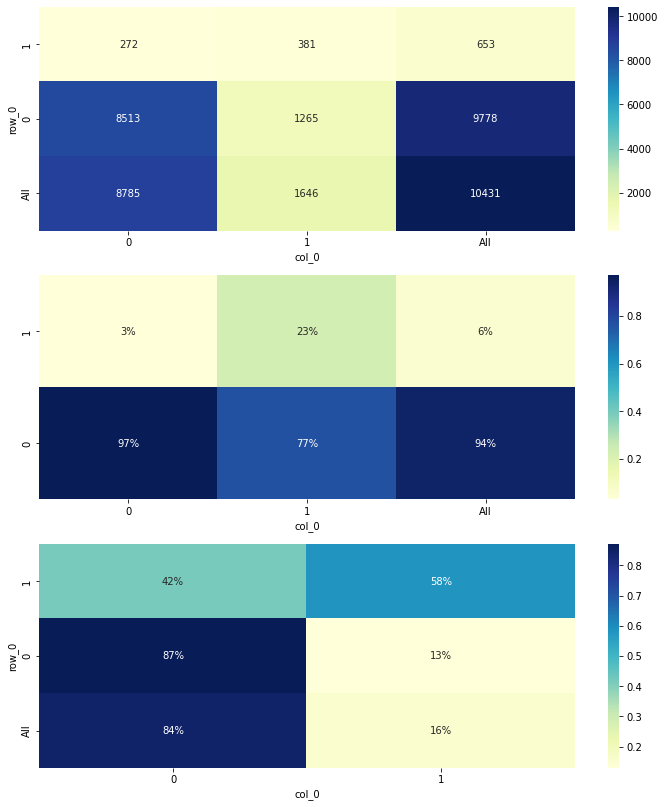

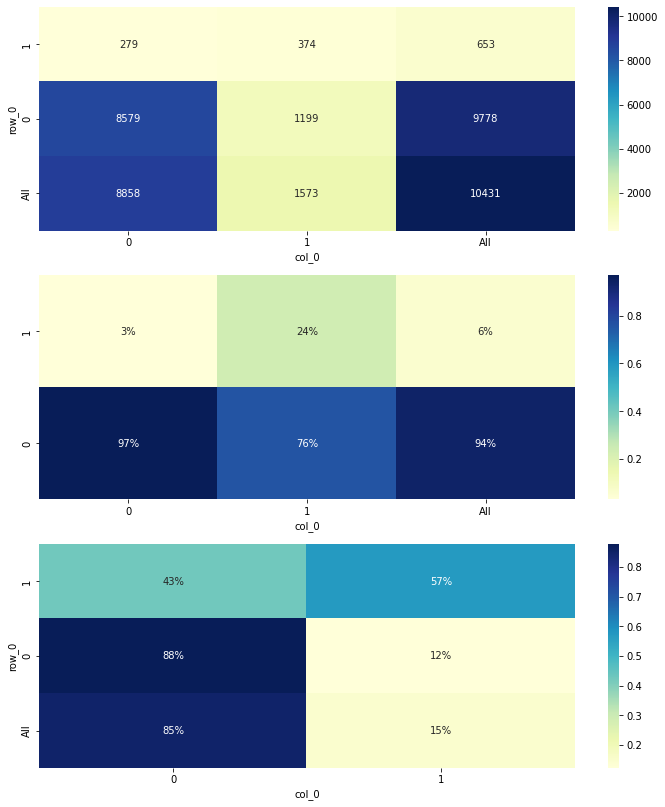

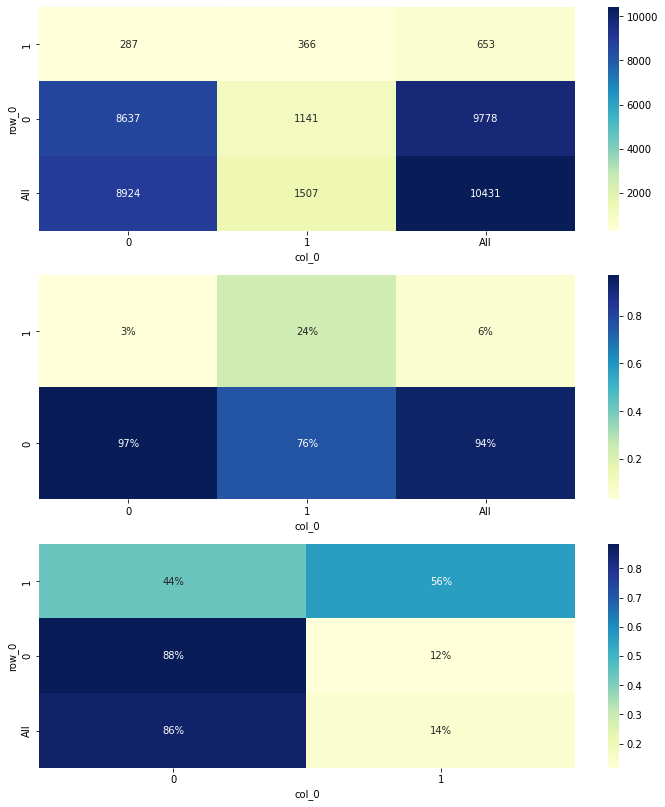

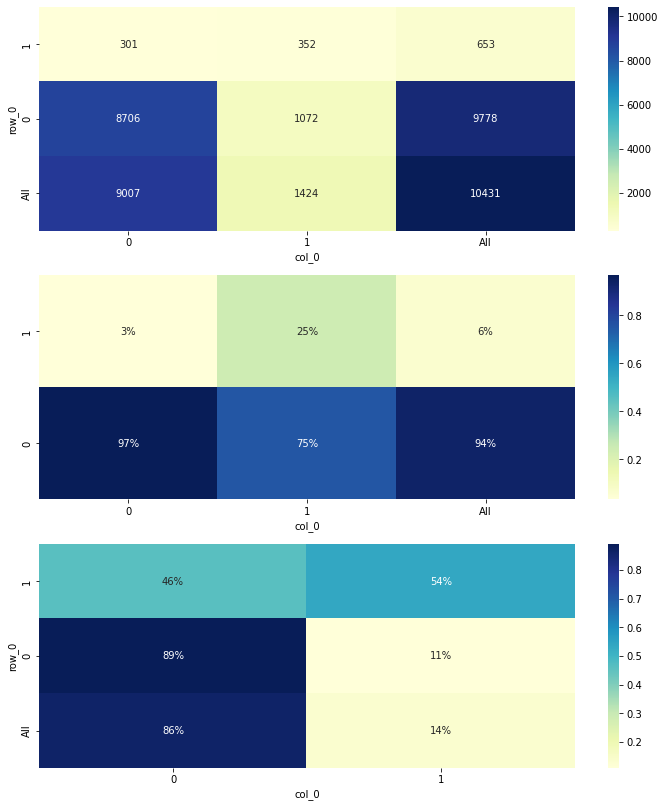

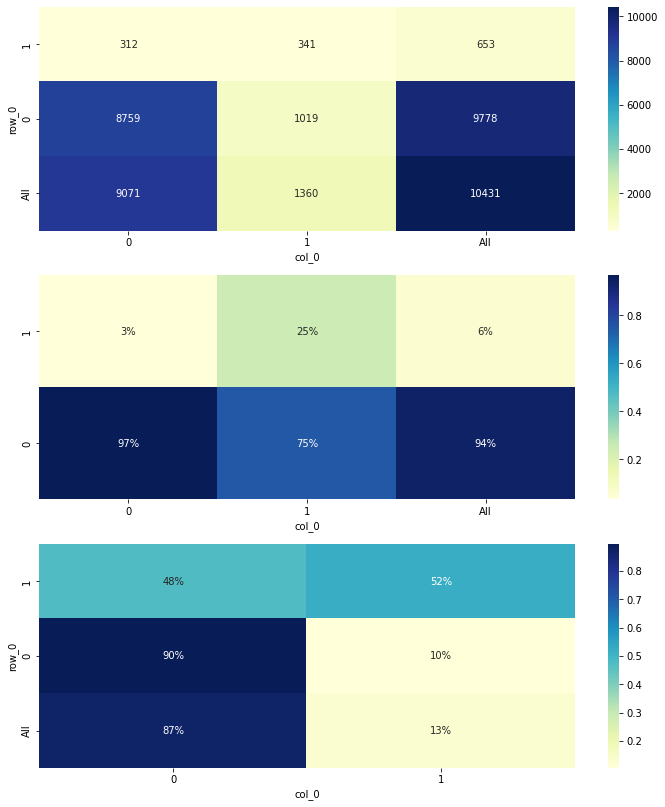

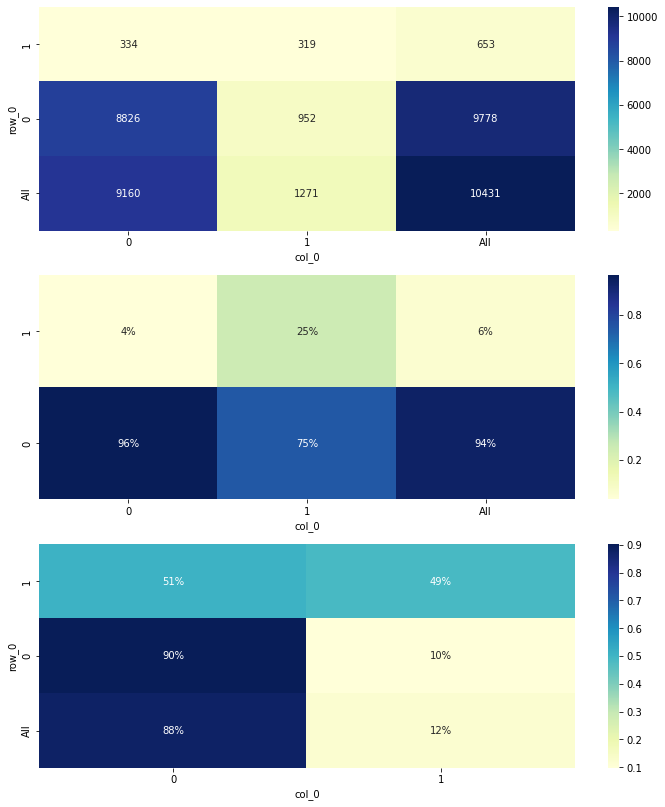

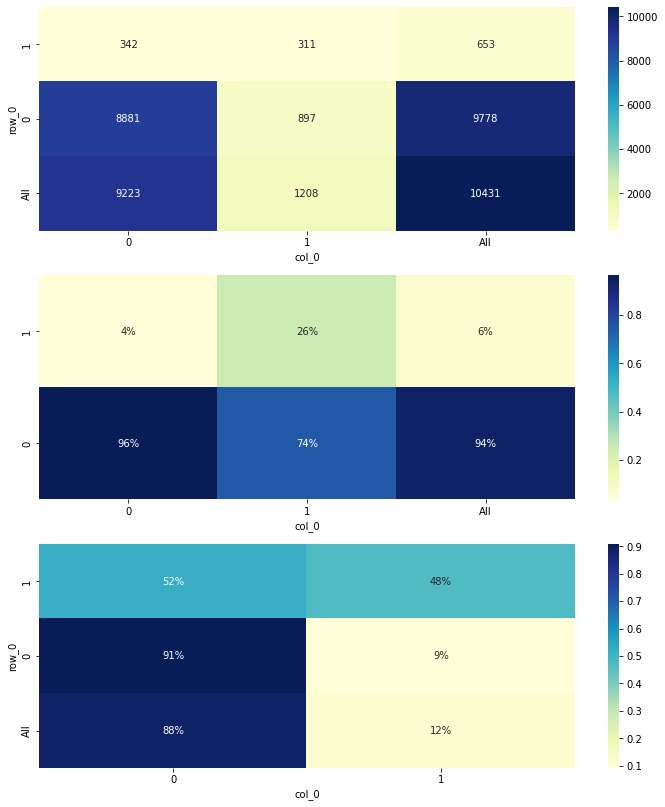

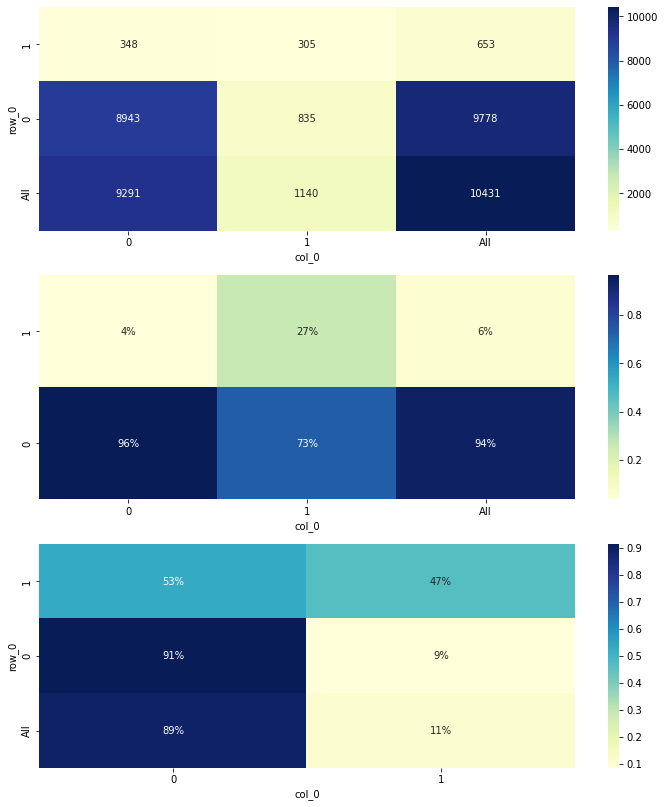

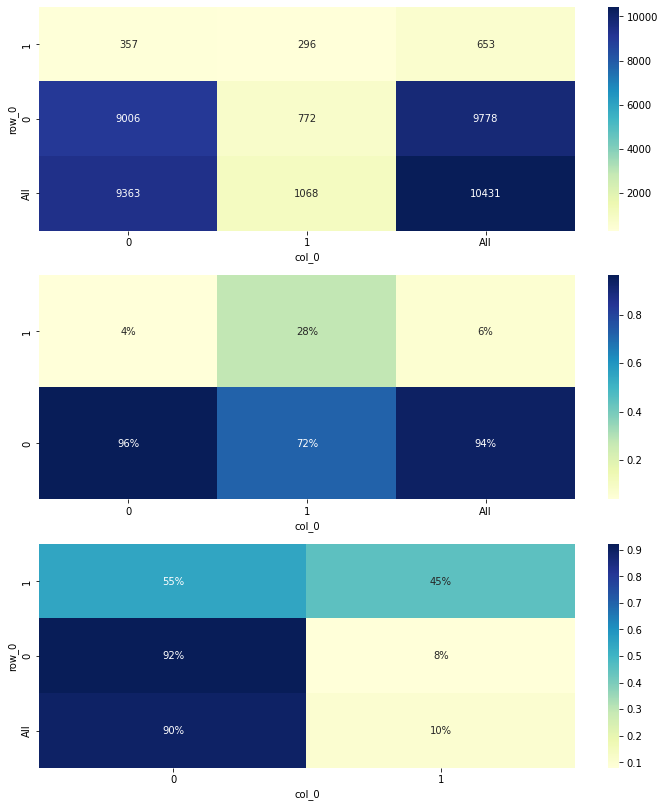

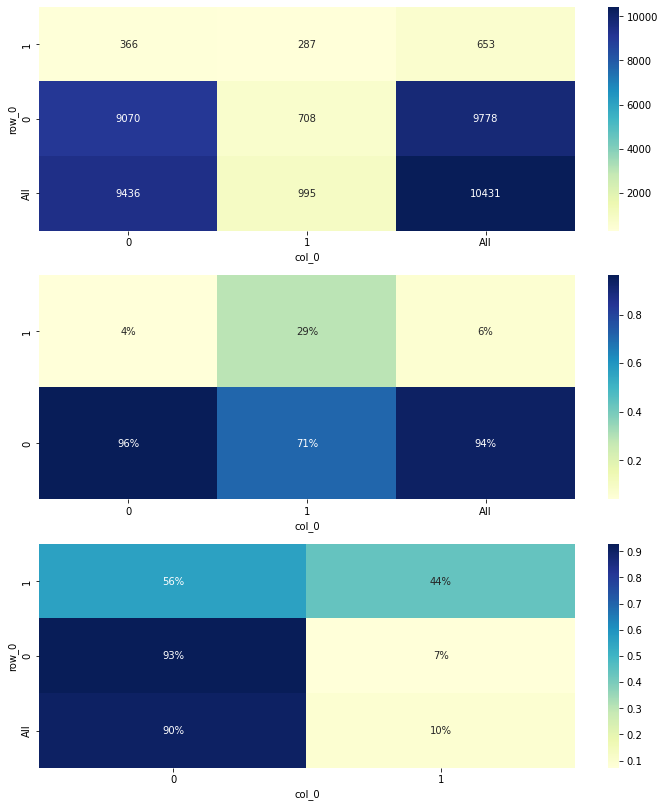

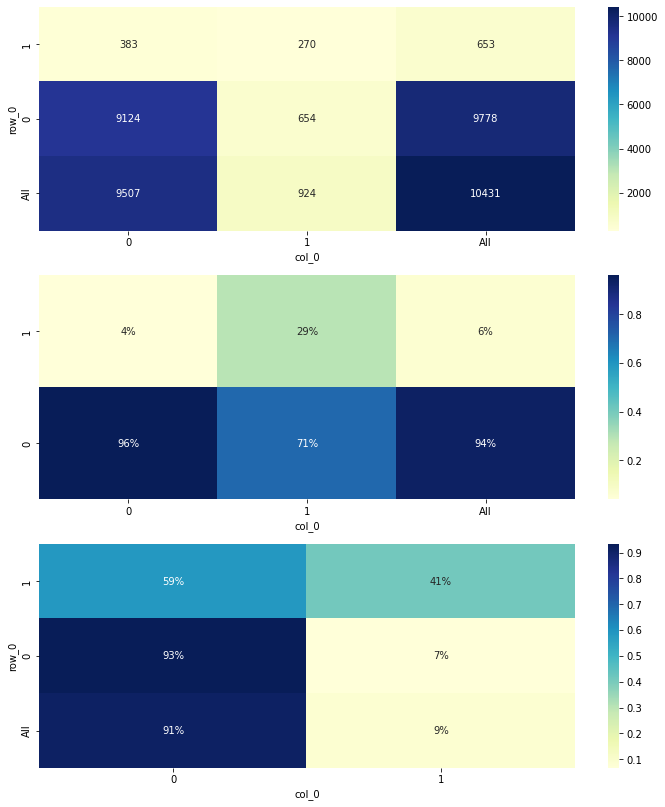

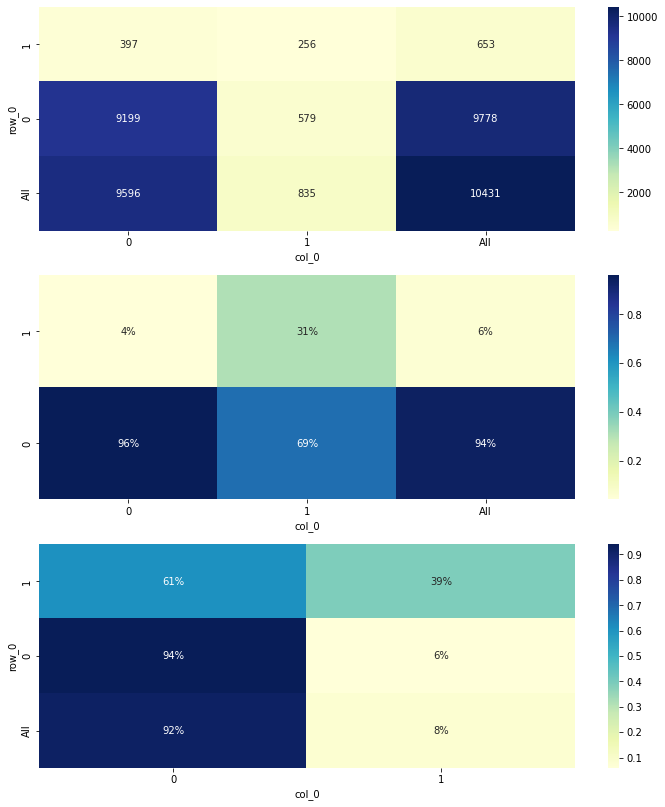

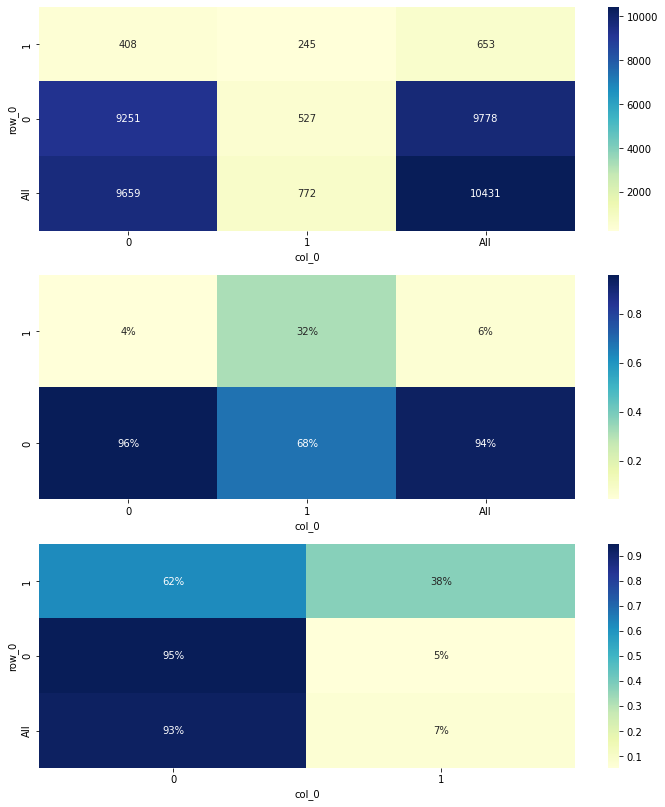

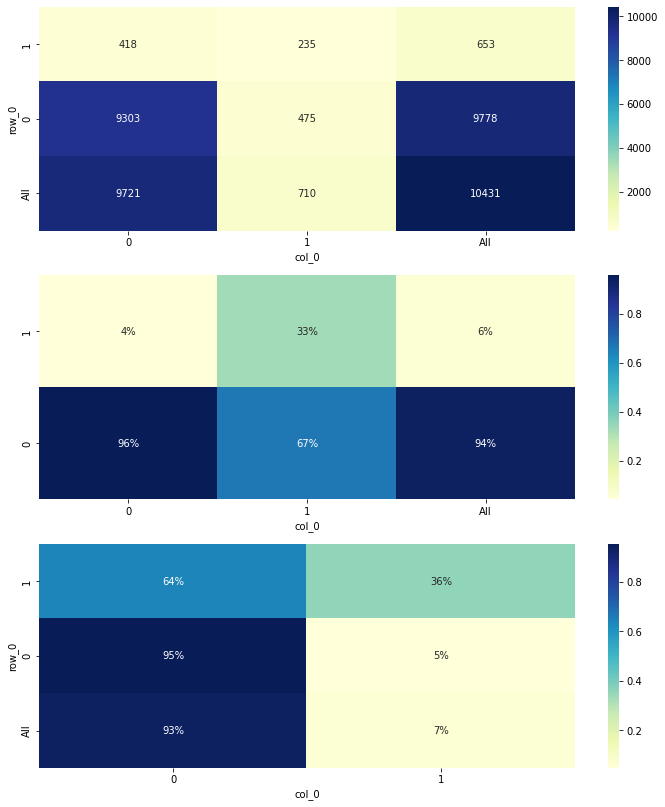

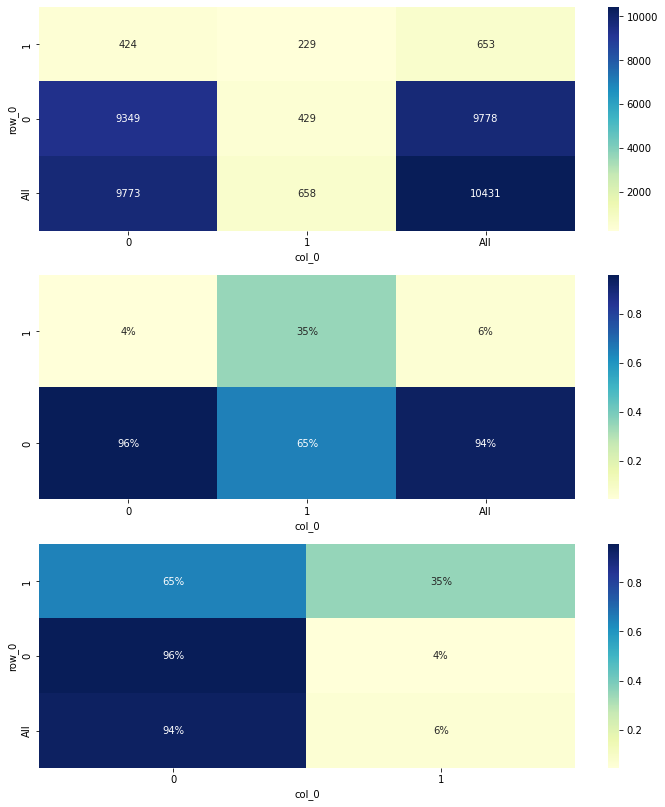

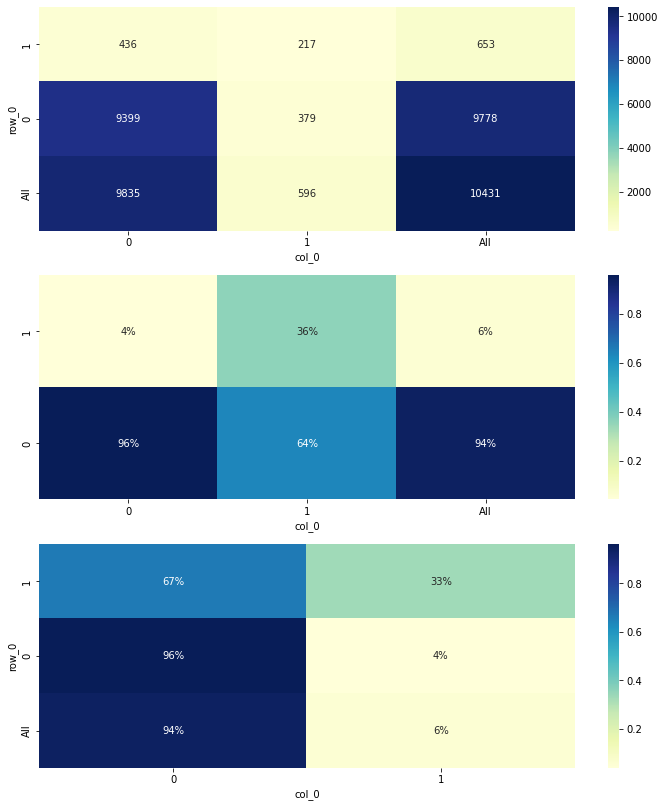

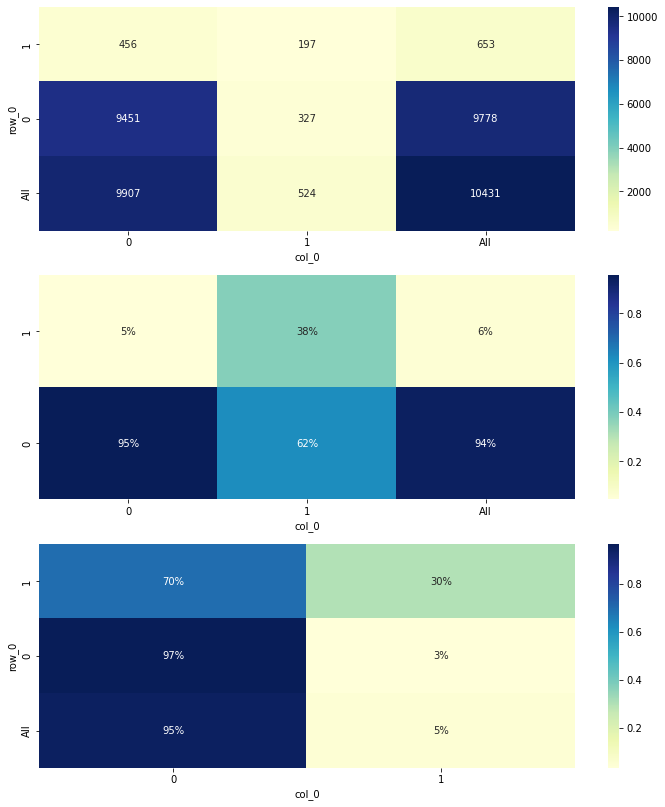

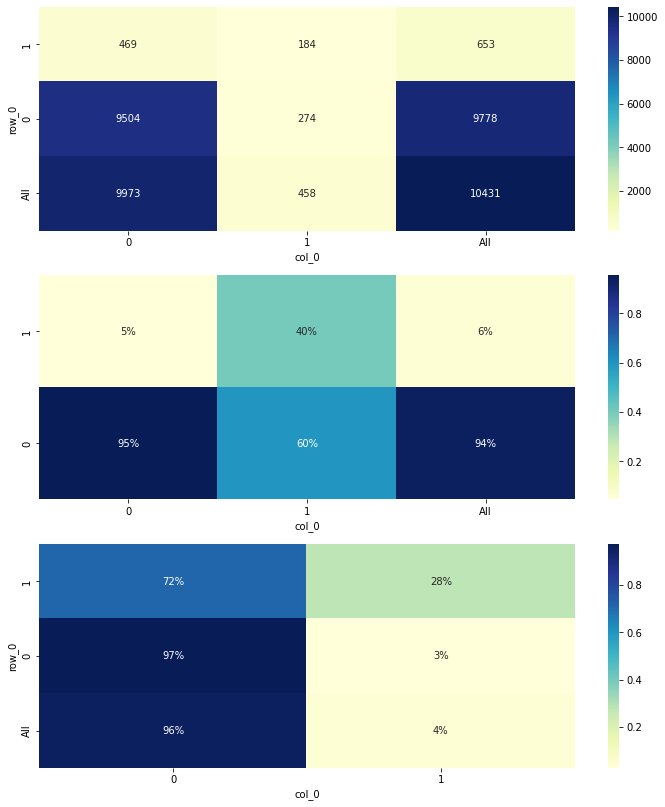

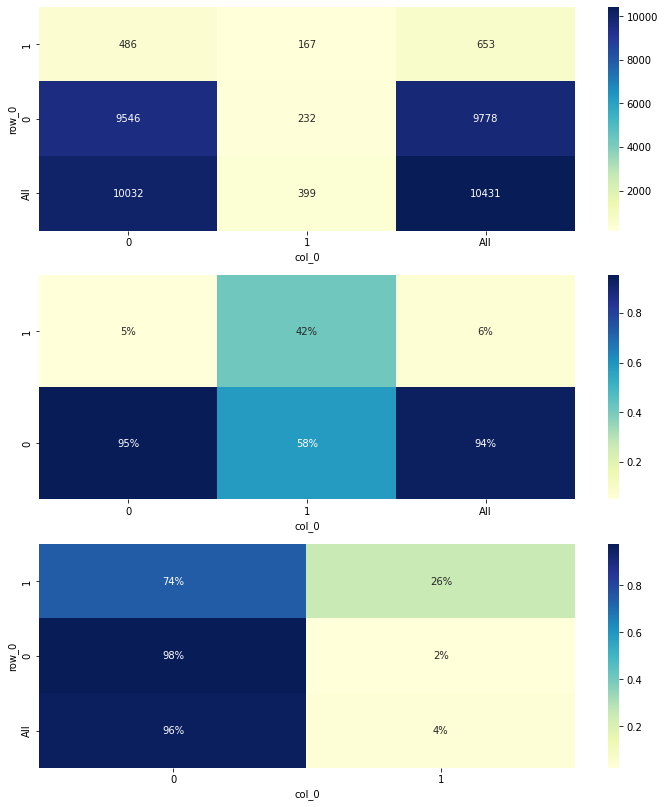

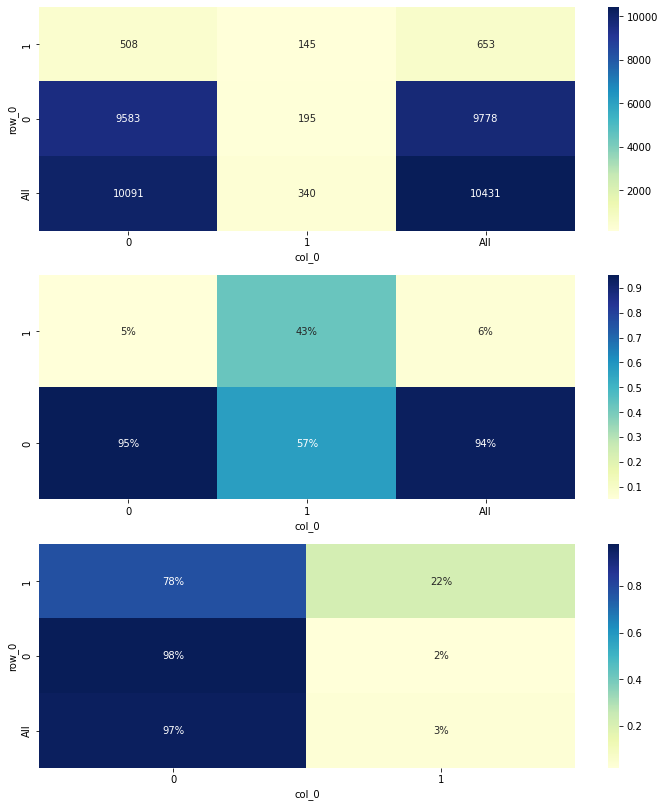

In [ ]:
#@title lightgbm score
#threshold = 0.5 #@param {type:"number"}
from sklearn.metrics import f1_score
for threshold in np.arange(0.6,.8,.01):
  print("threshold:",threshold)
  y_prednor=np.asarray([1 if c>threshold else 0 for c in y_pred])
  global_ml, column_ml, index_ml , clas_ml = m_learning_sc (y_test,y_prednor , x_var, scaler, pca, df_all)

In [ ]:
#save lgb
import pickle
met_ml={"scaler":scaler,"pca":pca,"model":model,"Confusion matrix":global_ml,"Precision":column_ml,
            "Recall":index_ml,"Classification report":clas_ml,"met_var_sc":met_var_sc,"x_and_y_same":True,
            "D":int(met_model[-5:-4]),"interval":interval,"x_var":x_var,
            "y_var":y_var,"labels":labels,"coor":df_coor,"mod_res":"d03"}
file_name=input("algorithm filename (variable-station-(d0, d1...)?\n")
pickle.dump(met_ml, open("/content/drive/MyDrive/Colab Notebooks/algorithms/"+file_name+".al", 'wb'))            

algorithm filename (variable-station-(d0, d1...)?
prueba
